In [4]:
# Let's try ellipse encoding directly, no bullshit

In [96]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [15]:

from dataset_4channel import BeetleDataset
import cv2
import matplotlib.pyplot as plt
import numpy as np

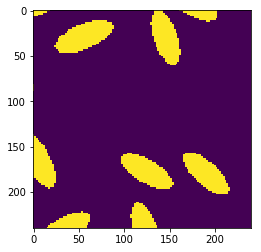

In [38]:
raw_files = ['raw_densebox_1', 'raw_densebox_2', 'raw_densebox_3', 'raw_densebox_4', 'raw_densebox_5']
label_files = ['class_lab_densebox_1', 'class_lab_densebox_2', 'class_lab_densebox_3', 'class_lab_densebox_4', 'class_lab_densebox_5']

db = BeetleDataset(raw_files, label_files)
#db = RotatedSquaresDataset()

x_b,y_b,x_thresh_b=db.generate_batch(n=1)
patch = x_thresh_b[0,0]
plt.imshow(patch)
plt.show()

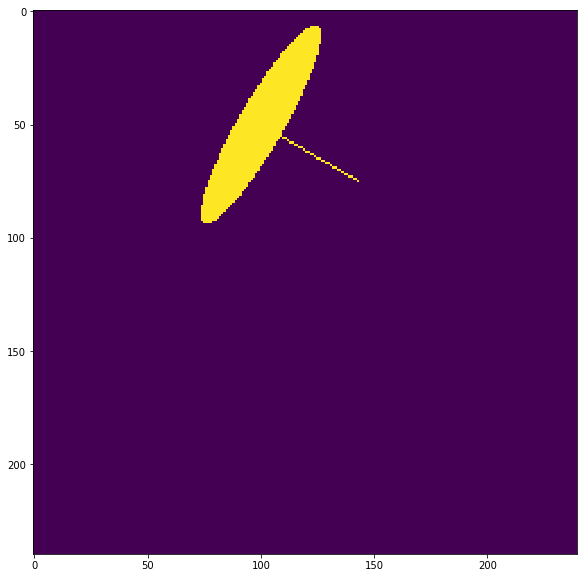

In [243]:
""" Sloppy code for doing drawing """

from skimage.measure import label, regionprops
from skimage.draw import ellipse
import math

plt.figure(figsize=(10,10))
#for angle in range(0,180,5):
patch2 = np.zeros((240,240))

# Draw an ellipse
angle = math.pi/3
#cv2.ellipse(patch2, ((100,100),(100,20),angle), color=(255,0,0), thickness=20)
rr,cc=ellipse(50,100,10,50,patch2.shape, rotation=angle)
patch2[rr,cc]=1
# Let's do some labelling

# Fuck this, let's switch to skimage and regionprops
# THis documentation sucks
# Extracting points and drawing line
angle_extracted = regionprops(label(patch2))[0].orientation
region =regionprops(label(patch2))[0]

r1 = int(region.centroid[0])
c1 = int(region.centroid[1])
r2  = int(r1 + region.major_axis_length/2*np.cos(angle_extracted))
c2 = int(c1 + region.major_axis_length/2*np.sin(angle_extracted))

from skimage.draw import line
rr,cc=line(r1,c1,r2,c2)
patch2[rr,cc]=1
plt.imshow(patch2)
plt.show()

In [237]:
line

<function skimage.draw.draw.line>